### Numerical schemes for differential problems


#### Previous works: Explicit Euler scheme
In the previous Tutorial, we have defined a python function ```EulerExpl(F, y0, T, N)``` that implements the explicit Euler scheme  for a function $F(y,t)$ (being either scalar or vector-valued), an initial condition $y_0$, a final time $T$, with a time discretization made of $N$ small intervals, with a time step
$h=\frac{T}{N}$. 
Output arrays are the discrete time array $td$ and the array (or matrix) $z$ or the scalar/vector states $y_n$ at discrete times $t_n$.

In [25]:
import numpy as np

def EulerExpl(F, y0, T, N):
    d = y0.size
    h = T / N;
    td = np.linspace(0, T, N+1)
    z = np.zeros((N+1, d))
    #
    z[0,:] = y0
    for n in range(0, N):
        z[n+1,:] = z[n,:] + h * F(z[n,:], td[n])
    return td, z

### Nonlinear Duffing oscillator

Let us recall the Duffing oscillator

\begin{align*}
& \dot x(t) = v(t), \\
& \dot v(t) = - \alpha\, x(t) -\beta\, x^3(t).
\end{align*}

The total energy of the system


$$
E=E(x,v) = \alpha \frac{x^2}{2} + \beta \frac{x^4}{4}
+ \frac{v^2}{2}
$$

is constant over time (this is a Hamiltonian system).
For the parameters, we will use $\alpha=1$ and $\beta=12$.

#### 1. Explicit Euler scheme

Apply the *explicit Euler scheme* to the Duffing oscillator (with $\mathbf{y}^0=(2,0)$, $T=4$ and $N=500$).
Plot the different discrete solutions $(t, x(t))$, $(t, v(t))$ and the evolution of the total energy $(t, E(t))$.

What happens ? Is it satisfying ?


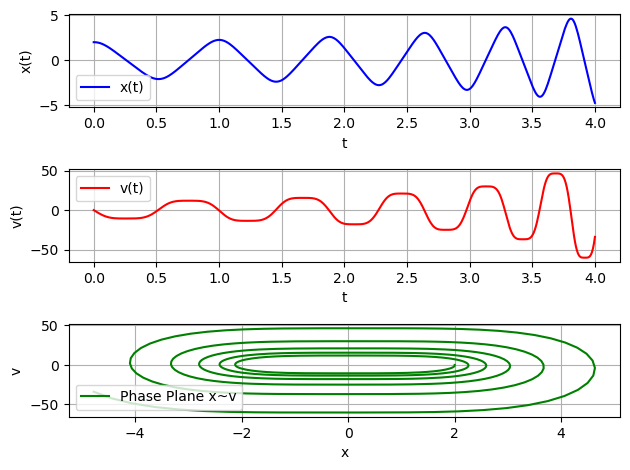

In [26]:
y0 = np.array([2, 0])
T = 4
N = 500

alpha = 1
beta = 12

def Duffing(y, t):
    x, v = y
    dxdt = v
    dvdt = (-alpha*x - beta*x**3)
    return np.array([dxdt, dvdt])

td, z = EulerExpl(Duffing, y0, T, N)
z.shape
x = z[:,0]
v = z[:,1]

import matplotlib.pyplot as plt

plt.subplot(3,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,2)
plt.plot(td, v, 'r', label = "v(t)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,3)
plt.plot(x, v, 'g', label = "Phase Plane x~v")
plt.xlabel("x")
plt.ylabel("v")
plt.legend(); plt.grid()

plt.tight_layout()

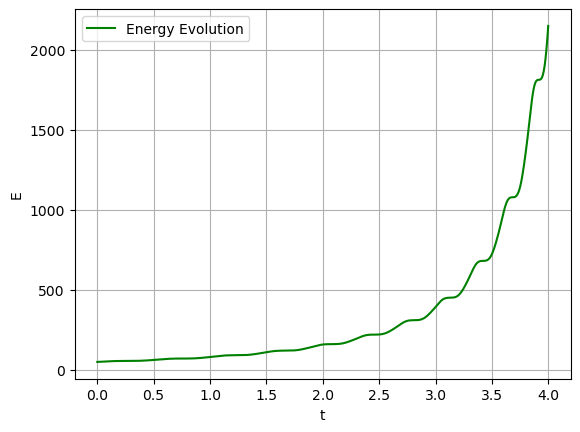

In [27]:
#Energy Evolution
def E(x, v):
    return alpha*(x**2/2) + beta*(x**4/4) + (v**2/2)

plt.plot(td, E(x,v), 'g', label = "Energy Evolution")
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()

In [28]:
#Comment: The result is exactly like we expected. As we know, by the energy analysis for the Euler Explicit Scheme we
#artifical energy creation which is not good :(.

#### 2. Second order  Runge-Kutta 2 'RK2' scheme

The so-called Runge-Kutta RK2 scheme (also called Euler-Cauchy scheme or Heun scheme) is a two-step scheme written as

\begin{align*}
& k_1 = F(z_n, t_n), \\[1.3ex]
& k_2 = F(z_n+h\,k_1,\, t_{n+1}) \\
& z_{n+1} = z_n + \frac{h}{2}\left( k_1+k_2\right).
\end{align*}

Write a python function ```RK2(F, y0, T, N)``` that implements the RK2 scheme.

In [29]:
def RK2(F, y0, T, N):
    d = y0.size
    h = T / N;
    td = np.linspace(0, T, N+1)
    z = np.zeros((N+1, d))
    z[0,:] = y0
    for n in range(0, N):
        k1 = F(z[n, :], td[n])
        k2 = F(z[n, :] + h*k1, td[n+1])
        z[n+1,:] = z[n,:] + (h/2)*(k1+k2)
    return td, z

Then apply the RK2 scheme to the Duffing system, with the same parameters as above.
Again, plot the different discrete solutions $(t, x(t))$, $(t, v(t))$ and the evolution of the total energy $(t, E(t))$.

Compare to the solution returned by ```odeint()``` from ```scipy.integrate```.

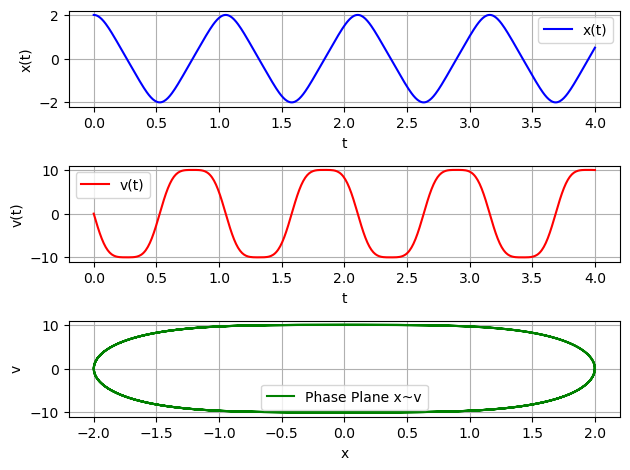

In [30]:
td, z = RK2(Duffing, y0, T, N)
z.shape
x = z[:,0]
v = z[:,1]

plt.subplot(3,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,2)
plt.plot(td, v, 'r', label = "v(t)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,3)
plt.plot(x, v, 'g', label = "Phase Plane x~v")
plt.xlabel("x")
plt.ylabel("v")
plt.legend(); plt.grid()

plt.tight_layout()

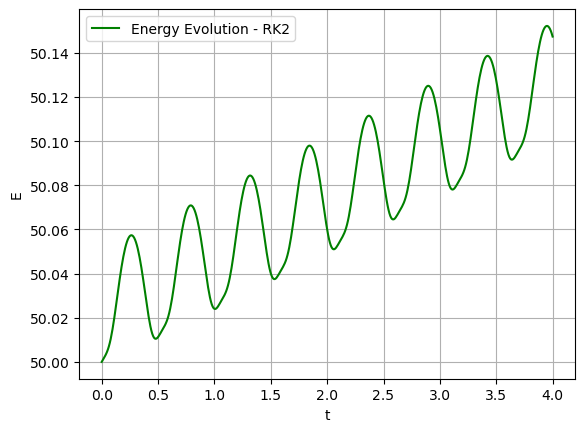

In [31]:
#Energy Evolution
def E(x, v):
    return alpha*(x**2/2) + beta*(x**4/4) + (v**2/2)

plt.plot(td, E(x,v), 'g', label = "Energy Evolution - RK2")
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()

In [32]:
#Comment: The RK2 scheme shows a nearly constant total energy with small oscillations around the true value. 
# This behavior matches the theoretical energy analysis — the method is almost conservative.

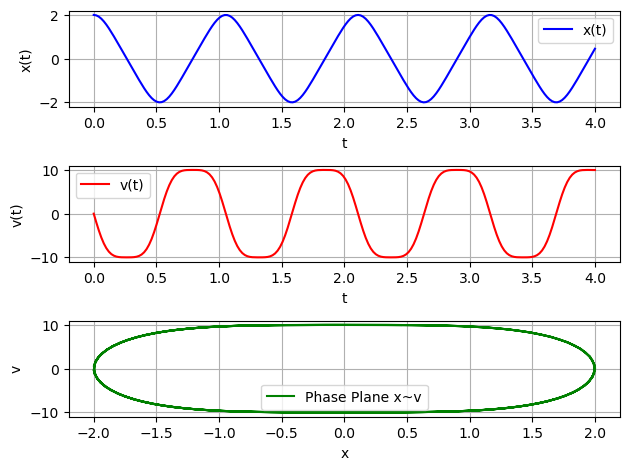

In [33]:
#Odeint Solution
from scipy.integrate import odeint
td = np.linspace(0,T, 200)
z = odeint(Duffing, y0, td)

z.shape
x = z[:,0]
v = z[:,1]

plt.subplot(3,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,2)
plt.plot(td, v, 'r', label = "v(t)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,3)
plt.plot(x, v, 'g', label = "Phase Plane x~v")
plt.xlabel("x")
plt.ylabel("v")
plt.legend(); plt.grid()

plt.tight_layout()

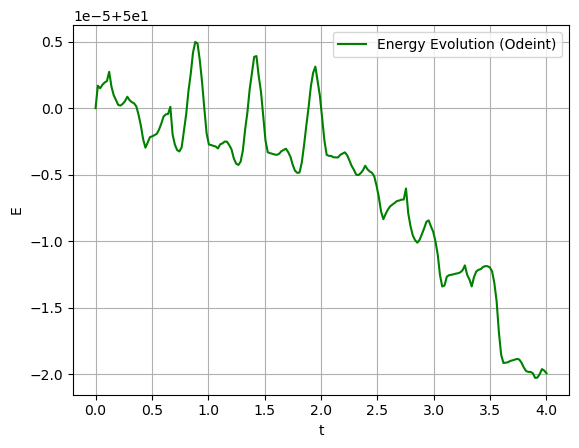

In [34]:
#Energy with Odeint Solution
def E(x, v):
    return alpha*(x**2/2) + beta*(x**4/4) + (v**2/2)

plt.plot(td, E(x,v), 'g', label = "Energy Evolution (Odeint)")
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()

In [35]:
# Comment: The odeint solution provides a highly accurate reference. The total energy remains essentially 
# constant, with very small variations caused by adaptive time-stepping.

#### 3. Numerical scheme with staggered variables (Verlet scheme)

Specifically for the Duffing system, try to implement the following scheme
that integrates the system with position and velocity variables discretized at different time locations (scheme with staggered variables):

\begin{align*}
	& x_{n+1} = x_n + h v_{n+1/2}, \\
	& v_{n+3/2} = v_{n+1/2} - h\alpha\, x_{n+1} - h \beta\, x_{n+1}^3.  
\end{align*}

The initial data still are $x_0=2$ and $v_0=0$. For the "initialization" of 
$v_{1/2}$, one could use the *explicit Euler scheme* on $v$ to compute an estimation
of the velocity $v$ at time $t_{1/2}=\frac{h}{2}$:

$$
v_{1/2} = v_0 - \frac{h}{2}\alpha\, x_0 - \frac{h}{2}\beta\, x_0^3.
$$

A uniform time subdivision with constant time step $h=\frac{T}{N}$ will be used.
Plot the discrete solutions $t\mapsto x(t)$ and $t\mapsto v(t)$ being obtained.
Consider the following parameters in your script: $T=4$, $N=100$.

\begin{align*}
	& x_{n+1} = x_n + h v_{n+1/2}, \\
	& v_{n+3/2} = v_{n+1/2} - h\alpha\, x_{n+1} - h \beta\, x_{n+1}^3.  
\end{align*}

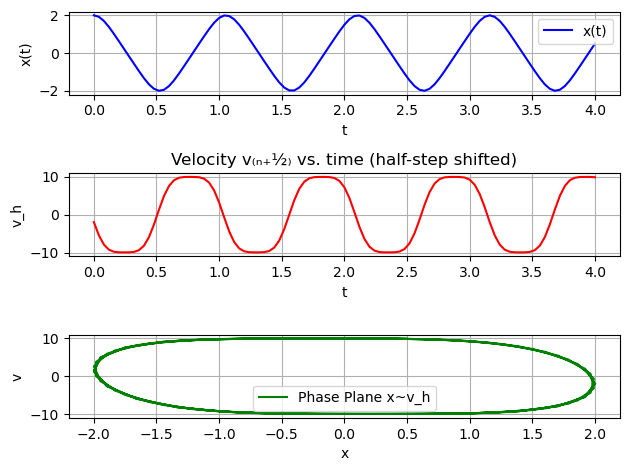

In [36]:
def Verlet(y0, T, N):
    h = T / N;
    td = np.linspace(0, T, N+1)
    x = np.zeros(N+1)
    v_h = np.zeros(N+1)

    x0, v0 = y0
    x[0] = x0
    v_h[0] = v0 - h/2 * alpha * x[0] - h/2 * beta * (x[0]**3)
    
    for n in range(N):
        x[n+1] = x[n] + h * v_h[n]
        v_h[n+1] = v_h[n] - h * alpha * x[n+1] - h * beta * (x[n+1])**3

    return x, v_h, td
    
y0 = np.array([2,0])
x, v_h, td = Verlet(y0, 4, 100)

plt.subplot(3,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,2)
plt.plot(td, v_h, 'r')
plt.title("Velocity v₍ₙ₊½₎ vs. time (half-step shifted)")
plt.xlabel("t")
plt.ylabel("v_h")
plt.grid()

plt.subplot(3,1,3)
plt.plot(x, v_h, 'g', label = "Phase Plane x~v_h")
plt.xlabel("x")
plt.ylabel("v")
plt.legend(); plt.grid()

plt.tight_layout()

#### Energy balance

Since the discrete variables of position $x_n$ and velocity $v_{n+1/2}$ are not defined at the same times, one cannot strictly define a total energy in a unique way.

One can however obtain an estimation of the energy at time $t_n$ by some
interpolation of the velocity:

$$
\hat v_n = \frac{v_{n-1/2}+v_{n+1/2}}{2}
$$

and then define $\hat E_n$ by

$$
\hat E_n = \alpha\frac{x_n^2}{2}+\beta \frac{x_n^4}{4} + \frac{\hat v_n^2}{2}.
$$

Plot the evolution of the total energy $\hat E_n$. Interpret.

Do it again with $N=200$, then $N=400$ to appreciate the accuracy gain (especially look at the total energy range).

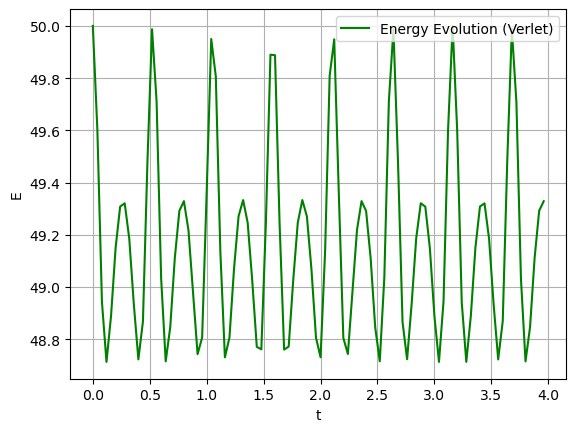

In [42]:
N = len(x) - 1

v = np.zeros(x.size)
for n in range(1, N):
    v[n] = (v_h[n-1] + v_h[n])  * 0.5

En = E(x,v)

#We just align v and x properly and we get energy nearly constant, with some slight oscillations
plt.plot(td[:-1], En[:-1], 'g', label="Energy Evolution (Verlet)")
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()

#### 4. Semi-implicit scheme

Still for the Duffing system, one can define the following semi-implicit scheme
(some terms are explicit, some others are implicit)

\begin{align*}
	& x_{n+1} = x_n + \frac{h}{2} (v_n + v_{n+1}), \\
	& v_{n+1} = v_{n} - \frac{h}{2}\alpha\, (x_n+x_{n+1}) - h\, \beta\, x_{n}^2\, x_{n+1} 
\end{align*}

(notice the term $- h\, \beta\, x_{n}^2\, x_{n+1} $).
Show that the scheme can be written in a condensed form

$$
A_n\, \mathbf{z}_{n+1} = \mathbf{z}_n. 
$$

for some matrix $A_n$, $\mathbf{z}_n=(x_n,v_n)^T$ and 
$\mathbf{z}_{n+1}=(x_{n+1},v_{n+1})^T$.
At each time step, we have to solve a linear system to get
$\mathbf{z}_{n+1}$ (using ```numpy.linalg.solve()``` for example). Check that the matrix $A_n$ is always invertible.

Implement the following numerical scheme. Plot the discrete solutions and the total energy during time as before. Compare to the other schemes.

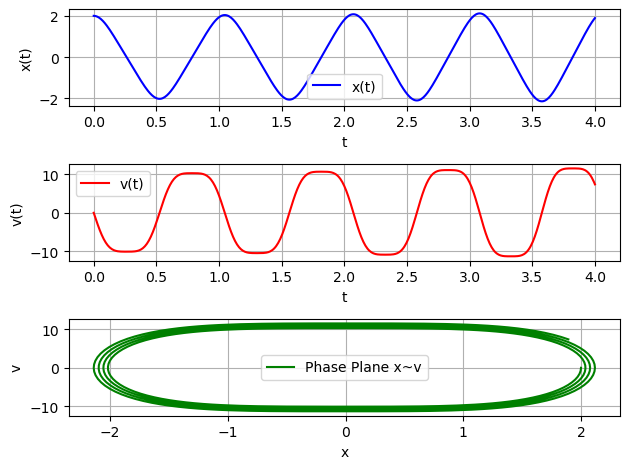

In [56]:
import numpy.linalg as la

def semi_implicit(y0, T, N):
    d = y0.size
    h = T / N;
    td = np.linspace(0, T, N+1)
    z = np.zeros((N+1, d))
    z[0,:] = y0
    C = np.array([[1, h/2],[-h/2*alpha, 1]])

    for n in range(N):
        x = z[n, 0]
        A = np.array([
            [1, -h/2],
            [h/2*alpha + h*beta*x**2, 1] #We can check det(A) > 0 | which means A is invertible and the equations stands.
        ])
        z[n+1, :] = la.solve(A, C@z[n, :])
    return td, z

y0 = np.array([2, 0])
T = 4
N = 500
td, z = semi_implicit(y0, T, N)

z.shape
x = z[:,0]
v = z[:,1]

plt.subplot(3,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,2)
plt.plot(td, v, 'r', label = "v(t)")
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend(); plt.grid()

plt.subplot(3,1,3)
plt.plot(x, v, 'g', label = "Phase Plane x~v")
plt.xlabel("x")
plt.ylabel("v")
plt.legend(); plt.grid()

plt.tight_layout()

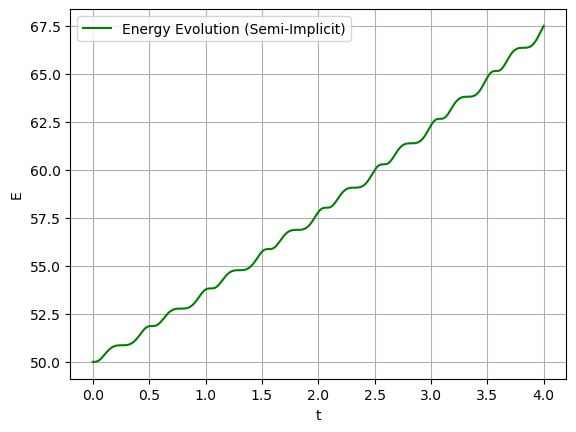

In [55]:
#Energy evolution for the semi-implicit scheme:

En = E(x,v)

plt.plot(td, En, 'g', label="Energy Evolution (Semi-Implicit)")
plt.xlabel("t")
plt.ylabel("E")
plt.grid()
plt.legend()

In [ ]:
# Comment: The semi-implicit scheme isn't exactly energy-preserving so we often get a slow monotone drift.

#### 5. Population dynamics: prey-predator (Lotka-Volterra) system

Consider the following prey-predator (Lotka-Volterra) system

\begin{align*}
& \dot x = (1-y)x, \\[1.3ex]
& \dot y = (x-1)y
\end{align*}

This system has an invariant quantity

$$
\eta(x,y) = x - \ln x + y - \ln y.
$$

Consider the initial condition $x(0)=4$, $y(0)=1$. Considering $T=50$ and $N=1000$,
compute and draw the discrete solutions for the following numerical schemes:

- Explicit Euler scheme
- RK2/Heun scheme

Plot also the quantity $\eta(t)$ during time $t$.

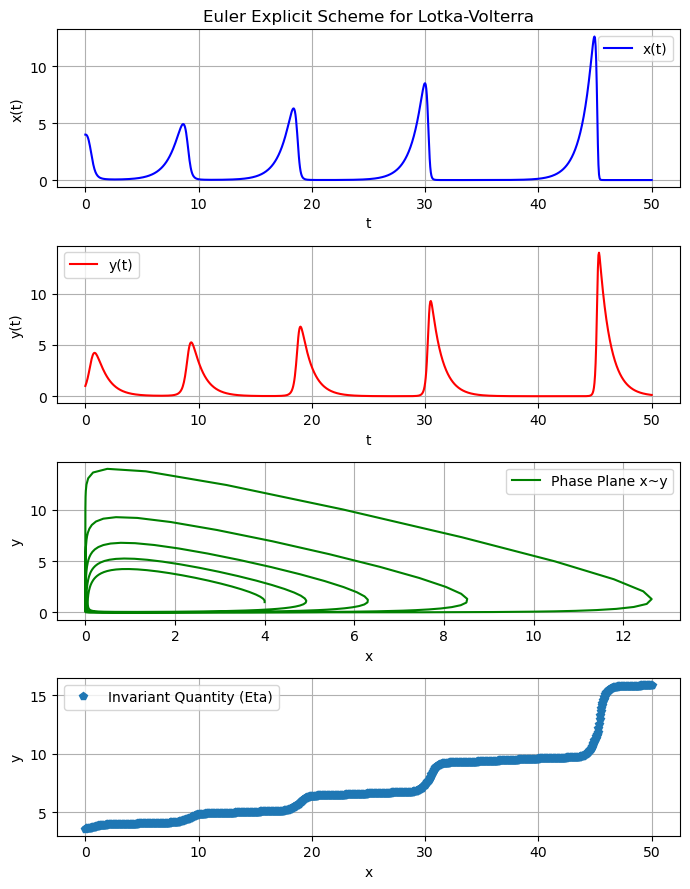

In [81]:
z0 = np.array([4, 1])
T = 50
N = 1000

def lot_vol(z, t):
    x, y = z
    dxdt = (1-y)*x
    dydt = (x-1)*y
    z = np.array([dxdt, dydt])
    return z

def eta(x, y):
    return x - np.log(x) + y - np.log(y)

td, z = EulerExpl(lot_vol, z0, T, N)
z.shape
x = z[:,0]
y = z[:,1]

plt.figure(figsize=(7, 9))

plt.subplot(4,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.title("Euler Explicit Scheme for Lotka-Volterra")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,2)
plt.plot(td, y, 'r', label = "y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,3)
plt.plot(x, y, 'g', label = "Phase Plane x~y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.subplot(4,1,4)
plt.plot(td, eta(x,y), 'p', label = "Invariant Quantity (Eta)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.tight_layout()

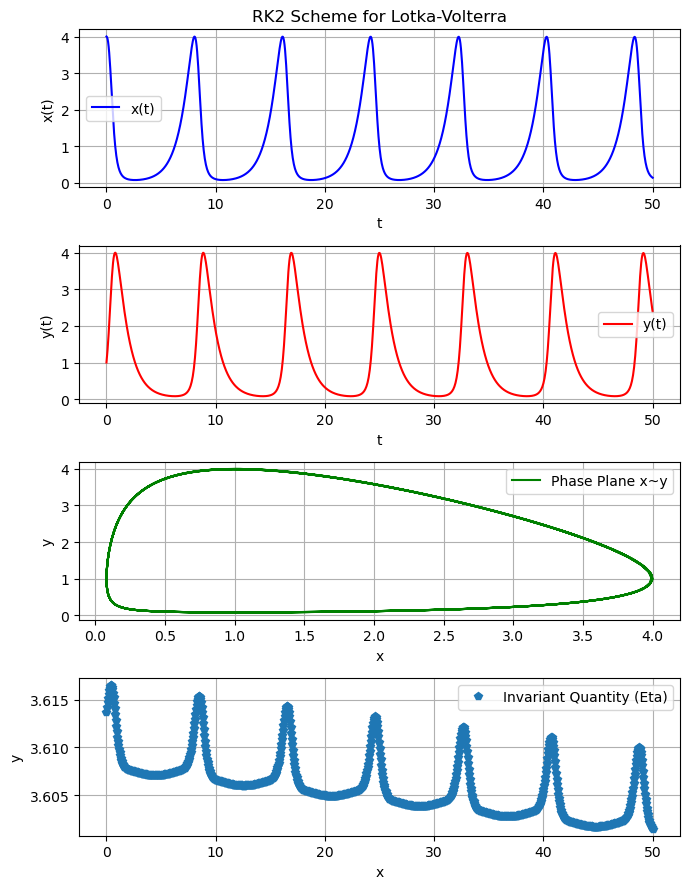

In [82]:
td, z = RK2(lot_vol, z0, T, N)
z.shape
x = z[:,0]
y = z[:,1]

plt.figure(figsize=(7, 9))

plt.subplot(4,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.title("RK2 Scheme for Lotka-Volterra")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,2)
plt.plot(td, y, 'r', label = "y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,3)
plt.plot(x, y, 'g', label = "Phase Plane x~y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.subplot(4,1,4)
plt.plot(td, eta(x,y), 'p', label = "Invariant Quantity (Eta)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.tight_layout()

Finally, consider the following predictor-corrector scheme (midpoint rule):

\begin{align*}
    & \hat z_{n+1/2} = z_n + \frac{h}{2} F(z_n, t_n), \\[1.3ex] 
    & z_{n+1} = z_n + h\, F(\hat z_{n+1/2}, t_n+h/2).
\end{align*}

Then apply it again to the prey-predator system, with the same parameters. Plot the solutions and the function $t\mapsto \eta(t)$.

In [72]:
def MidPoint(F, y0, T, N):
    d = y0.size
    h = T / N
    td = np.linspace(0, T, N+1)
    z = np.zeros((N+1, d))
    z[0, :] = y0

    for n in range(N):
        z_half = z[n, :] + (h/2) * F(z[n, :], td[n])
        z[n+1, :] = z[n, :] + h * F(z_half, td[n] + h/2)

    return td, z

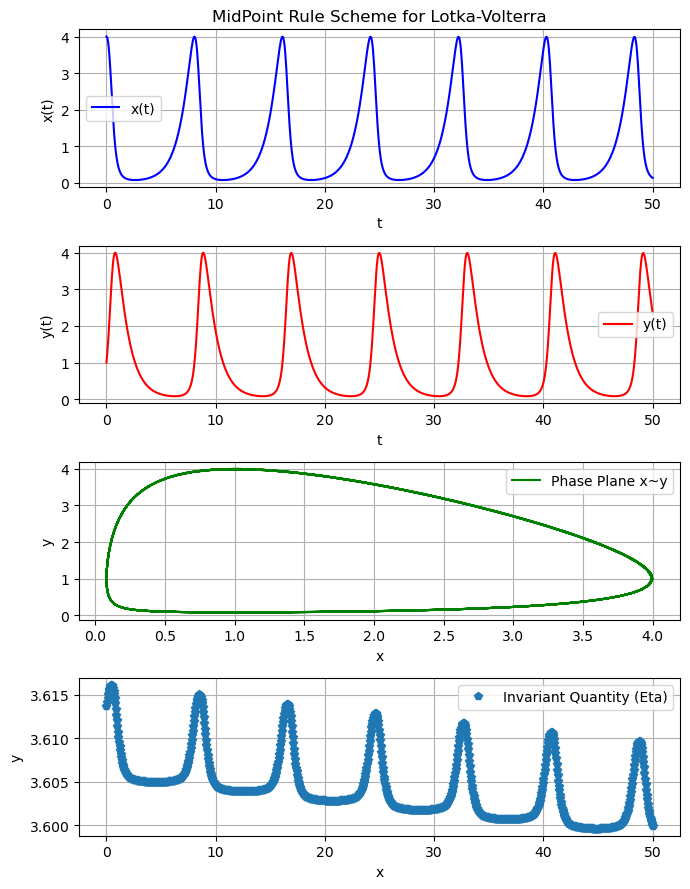

In [83]:
td, z = MidPoint(lot_vol, z0, T, N)
z.shape
x = z[:,0]
y = z[:,1]

plt.figure(figsize=(7, 9))

plt.subplot(4,1,1)
plt.plot(td, x, 'b', label = "x(t)")
plt.title("MidPoint Rule Scheme for Lotka-Volterra")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,2)
plt.plot(td, y, 'r', label = "y(t)")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.legend(); plt.grid()

plt.subplot(4,1,3)
plt.plot(x, y, 'g', label = "Phase Plane x~y")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.subplot(4,1,4)
plt.plot(td, eta(x,y), 'p', label = "Invariant Quantity (Eta)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(); plt.grid()

plt.tight_layout()